<a href="https://colab.research.google.com/github/Nzaya/Mchezopesa-Ltd/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2019_06_Sharon_Nzaya_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # QUESTION
  
  
  You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

# METRICS OF SUCCESS

# CONTEXT

# EXPERIMENTAL DESIGN TAKEN

# Importing necessary libraries

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.gridspec as gridspec
from numpy import random
import scipy.stats as scipy


# Statistical Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy

# Class imbalance 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline


# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.ensemble import RandomForest Classifier

from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

from IPython.display import display

from sklearn.metrics import accuracy_score


# Loading our dataset

In [0]:
#Loading our ranking dataset

ranking=pd.read_csv('/content/fifa_ranking.csv')
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
#Loading our results dataset

results=pd.read_csv('/content/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## EXPLORATORY DATA ANALYSIS

I am only going to use the information from Country, Rank, City, Home Team, Away Team, Home Score,Away Score, Confederation, Neutral and Tournament for the EDA.

This are the information which would be useful to understand the game.

In [0]:
#Creating a new ranking dataFrame

df=ranking[['rank','country_full','confederation','rank_date']]
df.head()

,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08


In [0]:
#creating a new result dataframe

df1=results[['home_team','away_team','home_score','away_score','tournament','city','country','neutral','date']]
df1.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30
1,England,Scotland,4,2,Friendly,London,England,False,1873-03-08
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03-07
3,England,Scotland,2,2,Friendly,London,England,False,1875-03-06
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03-04


In [0]:
#Merging the two new dataframe

merged=df.merge(df1,left_on='country_full',right_on='country')
merged.head()

,rank,country_full,confederation,rank_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date
0,1,Germany,UEFA,1993-08-08,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,1909-04-04
1,1,Germany,UEFA,1993-08-08,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False,1910-05-16
2,1,Germany,UEFA,1993-08-08,Germany,Netherlands,1,2,Friendly,Kleve,Germany,False,1910-10-16
3,1,Germany,UEFA,1993-08-08,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False,1911-03-26
4,1,Germany,UEFA,1993-08-08,Germany,Austria,1,2,Friendly,Dresden,Germany,False,1911-10-09


In [0]:
#creating a new column called results that is computed by the home score - the away score

merged['result'] = merged['home_score'] - merged['away_score']
      

In [0]:
#creating a function for the win ,loss and draw

def result(x):
  if x >0:
    return 'win'
  elif x<0:
    return 'loss'
  else:
    return 'draw'

In [0]:
#Implementing and applying our function

merged['results']=merged.result.apply(lambda x: result(x))

In [0]:
#previewing  the new dataset

merged.head()

,rank,country_full,confederation,rank_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date,result,results
0,1,Germany,UEFA,1993-08-08,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,1909-04-04,1,win
1,1,Germany,UEFA,1993-08-08,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False,1910-05-16,-3,loss
2,1,Germany,UEFA,1993-08-08,Germany,Netherlands,1,2,Friendly,Kleve,Germany,False,1910-10-16,-1,loss
3,1,Germany,UEFA,1993-08-08,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False,1911-03-26,4,win
4,1,Germany,UEFA,1993-08-08,Germany,Austria,1,2,Friendly,Dresden,Germany,False,1911-10-09,-1,loss


# Univariate Analysis

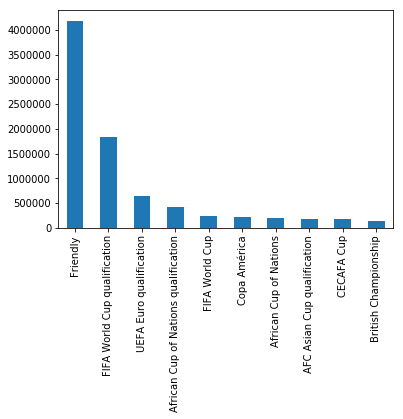

In [0]:
#Plotting a bar graph of tournament

merged['tournament'].value_counts().head(10).plot.bar()

From the bar graph above we can see that majority of the games played were friendly

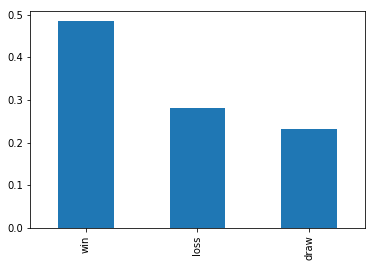

In [0]:
#Plotting a bar graph for the results

(merged['results'].value_counts().head(10)/len(merged)).plot.bar()

From the bar graph above we can see that majority of the games were won 

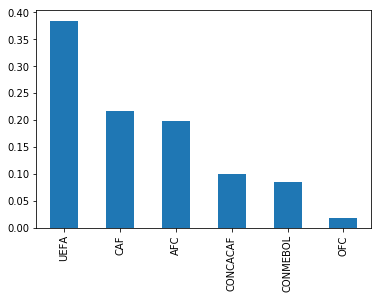

In [0]:
#plotting a bar graph for the confederation

(merged['confederation'].value_counts().head(10)/len(merged)).plot.bar()

From the above we can see that UEFA organized majority of the matches while OFC organized the least

# Selecting Countries of Interest

First we will to select the countries of interest for our analysis.
I am selecting England, Germany and Spain as these are the most popular and most watched leagues in football. These leagues are the most competitive league and it would give better understanding of the game

In [0]:
#Selecting the main countries

main_countries = ['England','Germany','Spain']
soccer = merged[merged.country_full.isin(main_countries)]
                          

# Merge the leagues with their corresponding matches

In [0]:
#Previewing the soccer dataset at the top

soccer.head()

,rank,country_full,confederation,rank_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date,result,results
0,1,Germany,UEFA,1993-08-08,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,1909-04-04,1,win
1,1,Germany,UEFA,1993-08-08,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False,1910-05-16,-3,loss
2,1,Germany,UEFA,1993-08-08,Germany,Netherlands,1,2,Friendly,Kleve,Germany,False,1910-10-16,-1,loss
3,1,Germany,UEFA,1993-08-08,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False,1911-03-26,4,win
4,1,Germany,UEFA,1993-08-08,Germany,Austria,1,2,Friendly,Dresden,Germany,False,1911-10-09,-1,loss


In [0]:
#Previewing the soccer dataset at the bottom

soccer.tail()

,rank,country_full,confederation,rank_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date,result,results
1843837,10,Spain,UEFA,2018-06-07,Spain,Bosnia and Herzegovina,1,0,Friendly,Las Palmas,Spain,False,2018-11-18,1,win
1843838,10,Spain,UEFA,2018-06-07,Argentina,Venezuela,1,3,Friendly,Madrid,Spain,True,2019-03-22,-2,loss
1843839,10,Spain,UEFA,2018-06-07,Spain,Norway,2,1,UEFA Euro qualification,Valencia,Spain,False,2019-03-23,1,win
1843840,10,Spain,UEFA,2018-06-07,DR Congo,Burkina Faso,0,0,Friendly,Marbella,Spain,True,2019-06-09,0,draw
1843841,10,Spain,UEFA,2018-06-07,Spain,Sweden,3,0,UEFA Euro qualification,Madrid,Spain,False,2019-06-10,3,win


In [0]:
#Find the highest and the lowest country

(soccer['country_full'].value_counts().head(10)/len(soccer)).plot.bar()

# Poisson Regression

The model is founded on the number of goals scored/conceded by each team. Teams that have been higher scorers in the past have a greater likelihood of scoring goals in the future.

In [0]:
soccer= soccer[:-10]
soccer.mean()

In [0]:
#The plot below shows the proportion of goals scored compared
#to the number of goals estimated by the corresponding Poisson distributions.

# construct Poisson  for each mean goals value
poisson_pred = np.column_stack([[poisson.pmf(i, soccer.mean()[j]) for i in range(8)] for j in range(2)])

# plot histogram of actual goals
plt.hist(soccer[['home_score', 'away_score']].values, range(9), 
         alpha=0.7, label=['Home', 'Away'],normed=True, color=["#FFA07A", "#20B2AA"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Match (Soccer Season)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

NameError: ignored

In [0]:
# probability of draw between home and away team

skellam.pmf(0.0,  soccer.mean()[0],  soccer.mean()[1])

In [0]:
# probability of home team winning by one goal

skellam.pmf(1,  soccer.mean()[0],  soccer.mean()[1])

In [0]:
skellam_pred = [skellam.pmf(i,  soccer.mean()[0],  soccer.mean()[1]) for i in range(-6,8)]

plt.hist(soccer[['home_score']].values - soccer[['away_score']].values, range(-6,8), 
         alpha=0.7, label='Actual',normed=True)
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()


# Building A Model

In [0]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat(socccer[['home_team','away_teamm','home_score']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent','home_score':'goals'}),
           soccer[['away_team','home_team','away_score']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent','away_score':'goals'}))

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

# Logistic Regression

I used different algorithms, Logistic regression and Random Forest, Gaussian NB and KNN to train the models and predict the outcome.
Then I defined a pipeline to optimize parameters of models 

In [0]:
#Loadung our dataset for regression

soccer.head()

,rank,country_full,confederation,rank_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date,result,results
0,1,Germany,UEFA,1993-08-08,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,1909-04-04,1,win
1,1,Germany,UEFA,1993-08-08,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False,1910-05-16,-3,loss
2,1,Germany,UEFA,1993-08-08,Germany,Netherlands,1,2,Friendly,Kleve,Germany,False,1910-10-16,-1,loss
3,1,Germany,UEFA,1993-08-08,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False,1911-03-26,4,win
4,1,Germany,UEFA,1993-08-08,Germany,Austria,1,2,Friendly,Dresden,Germany,False,1911-10-09,-1,loss


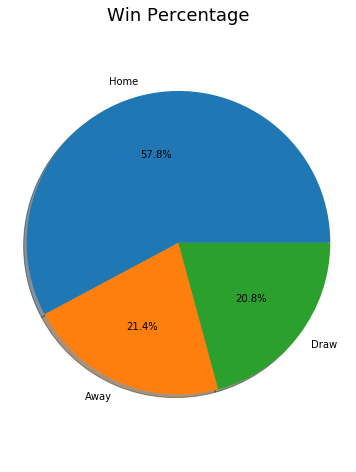

In [0]:
#Lets check the percantage of home win , away win and draw 

plt.figure(figsize=(6,8))
plt.pie(soccer['results'].value_counts(),labels=['Home','Away','Draw'], autopct='%1.1f%%',shadow=True, startangle=0)
plt.axis('equal')
plt.title('Win Percentage', size=18)
plt.show()

Making features for our model (As an obvious fact we do not know the results for the game that we are predicting! so we need to make some features based on the previous results for every match):

1)Taking the average of previous games different features for every team and considering as a new feature for our model (For example England played and scored, therefore we take this average (2 goals per game) and consider it as new feature)

2)I also defined a momentum which gives the average of five previous games for each team. It could be helpful to make our model more accurately. If for example some team in the five previous games shows poor results or great results, we can track them.

 We split the dataset into training(90%) and test (10%) sets. I use the test dataset only for the final prediction.

In [0]:
train_df, test_df = train_test_split(soccer, test_size = 0.1)
train_df

,rank,country_full,confederation,rank_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date,result,results
1280499,18,England,UEFA,1994-12-20,Iceland,Trinidad and Tobago,0,2,Friendly,London,England,True,2006-02-28,-2,loss
1817730,1,Spain,UEFA,2014-04-10,Spain,Albania,3,0,FIFA World Cup qualification,Seville,Spain,False,1992-04-22,3,win
135619,2,Germany,UEFA,2014-02-13,Germany,Turkey,5,1,UEFA Euro qualification,Berlin,Germany,False,1983-10-26,4,win
117549,3,Germany,UEFA,2011-07-27,Yugoslavia,DR Congo,9,0,FIFA World Cup,Gelsenkirchen,Germany,True,1974-06-18,9,win
1396765,9,England,UEFA,2009-11-20,Padania,Matabeleland,6,1,CONIFA World Football Cup,Sutton,England,True,2018-05-31,5,win
1377178,12,England,UEFA,2007-07-18,England,Luxembourg,9,0,UEFA Euro qualification,London,England,False,1982-12-15,9,win
33607,5,Germany,UEFA,1999-03-24,Portugal,Greece,1,2,Friendly,Düsseldorf,Germany,True,2008-03-26,-1,loss
1698128,5,Spain,UEFA,1993-12-23,Spain,Scotland,2,6,Friendly,Madrid,Spain,False,1963-06-13,-4,loss
1739005,6,Spain,UEFA,2001-05-16,Spain,Germany,1,0,Friendly,Barcelona,Spain,False,1974-02-23,1,win
118482,3,Germany,UEFA,2011-08-24,Germany,Faroe Islands,3,0,FIFA World Cup qualification,Hanover,Germany,False,2012-09-07,3,win


In [0]:
X_train = train_df.iloc[:,5:]
y_train = train_df.iloc[:,0]

X_test = test_df.iloc[:,5:]
y_test = test_df.iloc[:,0]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((459450, 10), (459450,), (51050, 10), (51050,))

In [0]:
X_train.describe()

In [0]:
X_train.isnull().sum()

away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
date          0
result        0
results       0
dtype: int64

# Home Team Advantage

In [0]:
sns.distplot(y_train,kde=False)
plt.ylabel("Frequency")

In [0]:
train_eda = pd.concat([X_train,y_train],axis=1,join='outer')

train_eda.shape

In [0]:
#Heatmap Correlation of X_train

train_corr = X_train.corr()

fig = plt.figure(figsize=(8,6))
sns.heatmap(train_corr,xticklabels=True, yticklabels=True)


ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

Random State SMOTE is a way of dealing with over sampling because we used only three countries of interest 

In [0]:
RANDOM_STATE_SMOTE = 42    
sm = SMOTE(random_state=RANDOM_STATE_SMOTE)    
    
sc = StandardScaler()
    
clf_lr = LogisticRegression(penalty='0', 
                          C=1,
                          random_state=1)
clf_gnb = GaussianNB()
clf_knn = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')

pipe_lr = make_pipeline(sc,clf_lr)
pipe_lr_smote = make_pipeline(sm,sc,clf_lr)
pipe_gnb = make_pipeline(sm,sc,clf_gnb)
pipe_knn = make_pipeline(sm,sc,clf_knn)

clf_vote_soft = VotingClassifier(estimators=[
        ('lr', pipe_lr), ('rf', pipe_rf), ('gnb', pipe_gnb),('knn', pipe_knn)], voting='soft')

clf_labels = ['Logistic Regression', 'Random Forest', 'Gaussian NB', 'KNN','Voting - Soft']
clf_list = [pipe_lr, pipe_rf, pipe_gnb, pipe_knn,clf_vote_soft]

In [0]:
print('10-fold cross validation:\n')
for clf, label in zip(clf_list, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

In [0]:
10-fold cross validation:

  ROC AUC: 0.54 (+/- 0.08) [Logistic Regression]
    ROC AUC: 0.55 (+/- 0.08) [Random Forest]
      ROC AUC: 0.53 (+/- 0.06) [Gaussian NB]
        ROC AUC: 0.50 (+/- 0.05) [KNN]
          ROC AUC: 0.54 (+/- 0.04) [Voting - Soft]


In [0]:
pipe_gnb.fit(X_train,y_train)
y_pred = pipe_gnb.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Draw','Win/Loss']))

In [0]:
pipe_rf.fit(X_train,y_train)
y_pred = pipe_rf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Draw','Win/Loss']))

# CONCLUSION